In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e597c9d0825f9de585e27489554451507e02178556e8cdba45a00c511c1bd95c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import numpy as np
import pandas as pd
import pymorphy2
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!wget https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1 -O banks.csv

--2024-12-15 18:50:01--  https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nyh951wqn1z1widxpfb95/banks.csv?rlkey=61immj9awxn9ksaynazcavuv8&dl=1 [following]
--2024-12-15 18:50:01--  https://www.dropbox.com/scl/fi/nyh951wqn1z1widxpfb95/banks.csv?rlkey=61immj9awxn9ksaynazcavuv8&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc56d83b643ca35f05dd9a72236a.dl.dropboxusercontent.com/cd/0/inline/CgUdCQ5D5VZVSk06EhsPdSo8s9JiOtO5_KxobCrfrc50H-x8iTNrIhMMOyw_lirQew_vHdLS_xqpAUwaMvGlco3HlCjOAIMTaH_gtTW_xJB0TszrBDBvBYaQ8d4jX_4mPzY/file?dl=1# [following]
--2024-12-15 18:50:02--  https://uc56d83b643ca35f05dd9a72236a.dl.dropboxusercontent.com/cd/0/inline/CgUdCQ5D5VZ

In [ ]:
!head banks.csv

idx	Score	Text
0	Positive	В Альфа-Банке работает замечательная девушка - Ильясова Орна, вежливая, отзывчивая, действительно участвует в запросе клиента, я приходила к ней подряд ровно три дня, каждый день она помнила время моего прихода, помогла оформить кредит в размере 1млн рублей, когда я пришла с партнером (передавать ей полученный кредит за покупаемый мною авто), специалист Ильясова Орна помогла нам вывести всю сумму в один день (а это было непросто), так что сделка состоялась и все остались довольны! Моя знакомая в конце всего добавила: Теперь я  поняла, почему мы пришли в это отделение, к этой девушке..Побольше бы таких замечательных специалистов! Приобретать программу здоровье, и вообще все, что связано с Альфа-Банком, теперь буду только у нее!
1	Negative	Оформляя рассрочку в м. Видео в меге тёплый стан. Попросила менеджера, чтобы заявка была без страховки. В итоге, когда подписывала договор, в договоре оказались лишние почти 6 тысяч, когда менеджера стала спрашивать что это за

In [ ]:
banks = pd.read_csv('banks.csv', sep='\t', index_col='idx');

In [ ]:
banks

,Score,Text
idx,,
0,Positive,В Альфа-Банке работает замечательная девушка -...
1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...
2,Positive,Очень порадовала оперативность работы в банке....
3,Negative,Имела неосторожность оформить потреб. кредит в...
4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...
...,...,...
13994,Positive,"О высокой надёжности МКБ, порядочности и добро..."
13995,Positive,"Обслуживаюсь в офисе на Чернореченской 42а, ка..."
13996,Positive,Попала сегодня в очень неприятную ситуацию. Ре...


In [ ]:
text = banks.iloc[2]['Text']

In [ ]:
text

'Очень порадовала оперативность работы в банке. Заказал через интернет карту visa classic, потребовалось подойти в банк для подписания заявления. В тот же день мне открыли текущий счет с доступом через интернет по услуге Альфа-клик, а в течении недели я должен был получить карту. Наученный Сбербанком ожидать обещанное, я удивился, когда карта и правда пришла вовремя, при этом выдали мне ее минут за 5, что опять же очень порадовало. Да и операторы Воронежского отделения на пр-те Революции оказались очень добродушными, проконсультировали по всем ситуациям, о которых я уточнял.После этого я захотел подключить услугу Альфа-мобайл, для управления счетом через телефон, но забыл свой логин. Позвонив по горячей линии, девушка мне подсказала и логин, и подключила услугу (без обращения в банк), выслала в sms ссылку на приложение, то есть сервис был на должном уровне!В настоящий момент я являюсь клиентом Московского индустриального банка, ВТБ 24 и Сбербанка, сотрудничество с последними 2мя полнос

In [ ]:
banks['text_lower']  = banks['Text'].str.lower()
banks['text_lower'].head()

,text_lower
idx,
0,в альфа-банке работает замечательная девушка -...
1,оформляя рассрочку в м. видео в меге тёплый ст...
2,очень порадовала оперативность работы в банке....
3,имела неосторожность оформить потреб. кредит в...
4,небольшая предыстория: нашел на сайте mdm банк...


In [ ]:
banks.head()

,Score,Text,text_lower
idx,,,
0,Positive,В Альфа-Банке работает замечательная девушка -...,в альфа-банке работает замечательная девушка -...
1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...,оформляя рассрочку в м. видео в меге тёплый ст...
2,Positive,Очень порадовала оперативность работы в банке....,очень порадовала оперативность работы в банке....
3,Negative,Имела неосторожность оформить потреб. кредит в...,имела неосторожность оформить потреб. кредит в...
4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...,небольшая предыстория: нашел на сайте mdm банк...


In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...']

In [ ]:
banks['text_punct'] = banks['Text'].str.replace('[^\w\s]', ' ', regex=True)
banks['text_lower'].head()

,text_lower
idx,
0,в альфа-банке работает замечательная девушка -...
1,оформляя рассрочку в м. видео в меге тёплый ст...
2,очень порадовала оперативность работы в банке....
3,имела неосторожность оформить потреб. кредит в...
4,небольшая предыстория: нашел на сайте mdm банк...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))

def stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
banks['text_stopwords'] = banks['text_punct'].apply(stopwords)
banks['text_stopwords'].head()

,text_stopwords
idx,
0,В Альфа Банке работает замечательная девушка И...
1,Оформляя рассрочку м Видео меге тёплый стан По...
2,Очень порадовала оперативность работы банке За...
3,Имела неосторожность оформить потреб кредит Ал...
4,Небольшая предыстория Нашел сайте MDM банка ин...


In [ ]:
from collections import Counter
cnt = Counter()
for text in banks["text_stopwords"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('банка', 23826),
 ('банк', 16425),
 ('В', 15152),
 ('это', 14872),
 ('Я', 11868),
 ('карту', 9881),
 ('деньги', 9596),
 ('карты', 8955),
 ('очень', 7546),
 ('Альфа', 7441)]

In [ ]:
freq = set([w for (w, wc) in cnt.most_common(10)])
# функция удаления слов
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not
in freq])
# применение функции
banks["text_common"] = banks["text_stopwords"].apply(freqwords)
banks["text_common"].head()

,text_common
idx,
0,Банке работает замечательная девушка Ильясова ...
1,Оформляя рассрочку м Видео меге тёплый стан По...
2,Очень порадовала оперативность работы банке За...
3,Имела неосторожность оформить потреб кредит ба...
4,Небольшая предыстория Нашел сайте MDM интересн...


In [ ]:
freq = pd.Series(' '.join(banks['text_common']).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
banks['text_rare'] = banks['text_common'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
banks['text_rare'].head()

,text_rare
idx,
0,Банке работает замечательная девушка Ильясова ...
1,Оформляя рассрочку м Видео меге тёплый стан По...
2,Очень порадовала оперативность работы банке За...
3,Имела неосторожность оформить потреб кредит ба...
4,Небольшая предыстория Нашел сайте MDM интересн...


In [ ]:
# Удаление эмодзи
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#passing the emoji function to 'text_rare'
banks['text_rare'] = banks['text_rare'].apply(emoji)

In [ ]:
#Удаление цифр
banks['text_nonum'] = banks['text_common'].str.replace('\d+', '')
banks['text_nonum'].head()

,text_nonum
idx,
0,Банке работает замечательная девушка Ильясова ...
1,Оформляя рассрочку м Видео меге тёплый стан По...
2,Очень порадовала оперативность работы банке За...
3,Имела неосторожность оформить потреб кредит ба...
4,Небольшая предыстория Нашел сайте MDM интересн...


In [ ]:
#Удаление URL
# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# Examples
text = "This is my website, https://www.link.com"
remove_urls(text)
#Passing the function to 'text_rare'
banks['text_rare'] = banks['text_rare'].apply(remove_urls)

In [ ]:
#Удаление HTML-тегов
from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text
# Examples
text = """<div>
<h1> Это </h1>
<p> странца</p>
<a href="https://www.link.com/"> пример</a>
</div>
"""
print(html(text))
# Passing the function to 'text_rare'
banks['text_rare'] = banks['text_rare'].apply(html)


 Это 
 странца
 пример




In [ ]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [ ]:
from nltk.corpus import stopwords
import pymorphy2


stop_words = stopwords.words("russian")
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...']
morph = pymorphy2.MorphAnalyzer()

# Применение функции preprocess
banks[0:5].apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

,0
idx,
0,"[альфа-банк, работать, замечательный, девушка,..."
1,"[оформлять, рассрочка, м., видео, мег, тёплый,..."
2,"[очень, порадовать, оперативность, работа, бан..."
3,"[иметь, неосторожность, оформить, потреба, кре..."
4,"[небольшой, предыстория, найти, сайт, mdm, бан..."


In [ ]:
banks['Preprocessed_texts'] = banks.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [ ]:
banks

In [ ]:
import numpy as np
import pandas as pd
import pymorphy2
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    """Removes stopwords from a string.

    Args:
        text: The string to remove stopwords from.

    Returns:
        The string with stopwords removed.
    """
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

def tokenize_lemmas(text):
    """Tokenizes and lemmatizes a string.

    Args:
        text: The string to tokenize and lemmatize.

    Returns:
        A list of lemmatized tokens.
    """
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

banks['text_ready']  = banks['Text'].str.lower()
banks['text_ready'] = banks['text_ready'].str.replace('\d+', '')
banks['text_ready'] = banks['text_ready'].str.replace('[^\w\s]','')
banks['text_ready'] = banks['text_ready'].apply(remove_urls)
banks['text_ready'] = banks['text_ready'].apply(html)
banks["text_ready"] = banks["text_ready"].apply(remove_stopwords)
banks['text_ready'] = banks['text_ready'].apply(emoji)
banks['text_ready'] = banks['text_ready'].apply(remove_urls)
banks['text_ready'] = banks['text_ready'].apply(html)
banks["text_ready"] = banks["text_ready"].map(lambda x: " ".join(tokenize_lemmas(x)))
banks[['text_ready']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-25-76f376c9c83d>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


,text_ready
idx,
0,альфа-банке работает замечательная девушка - и...
1,оформляя рассрочку м. видео меге тёплый стан ....
2,очень порадовала оперативность работы банке . ...
3,имела неосторожность оформить потреб . кредит ...
4,небольшая предыстория : нашел сайте mdm банка ...


In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
w2v_model = Word2Vec(
    min_count=5,
    window=5,
    vector_size=1000,
    negative=5,
    workers=24,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [ ]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

class MySentences(object):
    def __init__(self, docs):
        self.corpus = docs
    def __iter__(self):
        for doc in self.corpus:
            doc_sentences = sent_tokenize(doc)
            for sent in doc_sentences:
                yield simple_preprocess(sent) # yields a tokenized

In [ ]:
sentences = MySentences(banks['text_ready'].tolist())

In [ ]:
w2v_model.build_vocab(sentences)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=5, report_delay=1)

(7003398, 10949410)

In [ ]:
w2v_model.init_sims(replace=True)

<ipython-input-40-c7757d71a30b>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [ ]:
w2v_model.wv.most_similar(positive=["ужасный"], topn=30)

[('отвратительный', 0.952438473701477),
 ('полезно', 0.9010539054870605),
 ('заслуженно', 0.8915074467658997),
 ('относитесь', 0.8902542591094971),
 ('дорожите', 0.8892043828964233),
 ('худший', 0.8888790607452393),
 ('пользователям', 0.8884511590003967),
 ('многим', 0.8882650136947632),
 ('выбирайте', 0.8862558603286743),
 ('держаться', 0.8843053579330444),
 ('удивлять', 0.88359534740448),
 ('стремится', 0.8835296630859375),
 ('читатель', 0.8827661275863647),
 ('научитесь', 0.878715455532074),
 ('полезен', 0.8778975009918213),
 ('лояльный', 0.8766571283340454),
 ('слоган', 0.8758232593536377),
 ('серьезный', 0.8755574226379395),
 ('явный', 0.8750309348106384),
 ('современным', 0.8745728731155396),
 ('однозначно', 0.8745580315589905),
 ('советовал', 0.8745191097259521),
 ('постоянный', 0.8736629486083984),
 ('ориентирован', 0.8731253147125244),
 ('снижать', 0.8730104565620422),
 ('желающие', 0.8725581765174866),
 ('наплевательским', 0.8723276853561401),
 ('наплевательски', 0.8716989755

In [ ]:
w2v_model.wv.most_similar(positive=["кэшбек", "продукт", "услуга"], topn=50)

[('бинбонус', 0.8995100259780884),
 ('бонусная', 0.8989164233207703),
 ('подразумевает', 0.8960047960281372),
 ('защищенная', 0.8847336769104004),
 ('заинтересовала', 0.8791159391403198),
 ('ненужная', 0.8777902126312256),
 ('платной', 0.8712894916534424),
 ('включено', 0.8712557554244995),
 ('бесплатная', 0.8673592805862427),
 ('бесплатна', 0.8648974895477295),
 ('платным', 0.8629271984100342),
 ('умолчанию', 0.8626935482025146),
 ('мужская', 0.8616279363632202),
 ('эконом', 0.861099123954773),
 ('льготная', 0.8608875870704651),
 ('бесплатен', 0.8607550859451294),
 ('полезная', 0.857452929019928),
 ('космополитен', 0.8570263981819153),
 ('ценой', 0.856955885887146),
 ('выгодная', 0.855025053024292),
 ('бонусами', 0.8542081117630005),
 ('навязанная', 0.8539601564407349),
 ('лайт', 0.8539425134658813),
 ('подключенная', 0.8538593053817749),
 ('опция', 0.8532499074935913),
 ('платой', 0.8526129126548767),
 ('годовая', 0.8518962264060974),
 ('пользуешься', 0.8512741327285767),
 ('повышенн

In [ ]:
w2v_model.wv.most_similar(positive=["продукт", "время", "вернуть"], negative=["ужасный"], topn=100)

[('снятые', 0.6647319197654724),
 ('обнулить', 0.6554523706436157),
 ('согласились', 0.6552342176437378),
 ('забыв', 0.6544947028160095),
 ('основную', 0.6523891687393188),
 ('расторгнуть', 0.6451830863952637),
 ('продлить', 0.643165111541748),
 ('аннулировать', 0.6424216032028198),
 ('временную', 0.6420928239822388),
 ('мотивируя', 0.641787052154541),
 ('уверял', 0.6406365633010864),
 ('перечислить', 0.6405771970748901),
 ('переоформить', 0.6369448304176331),
 ('пересчитать', 0.636738657951355),
 ('разблокировать', 0.635907769203186),
 ('заявил', 0.6354883909225464),
 ('верну', 0.6350235939025879),
 ('полагающиеся', 0.6348938345909119),
 ('потраченную', 0.6332093477249146),
 ('перечислили', 0.6331350207328796),
 ('ненужную', 0.633027195930481),
 ('умудрились', 0.6316083669662476),
 ('аннулировали', 0.6310324668884277),
 ('уничтожить', 0.630134642124176),
 ('имеющуюся', 0.6297668218612671),
 ('прежнюю', 0.6285344362258911),
 ('навязала', 0.6281737089157104),
 ('оставшиеся', 0.627021551

In [ ]:
w2v_model.wv.most_similar_to_given("ужасный", ["продукт", "консультант", "человек", "карта"])

'продукт'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np # Import numpy

def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']

    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')

    # Convert the list of word vectors to a NumPy array
    vectors_words = np.array(vectors_words)

    # t-SNE reduction
    # Decreased perplexity to 10 (less than the number of samples)
    Y = (TSNE(n_components=2, random_state=0, perplexity=10, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

<ipython-input-47-349d8150bb75>:10: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vectors_words = [model.wv.word_vec(word)]
<ipython-input-47-349d8150bb75>:16: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  wrd_vector = model.wv.word_vec(wrd_score[0])
<ipython-input-47-349d8150bb75>:23: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  wrd_vector = model.wv.word_vec(wrd)


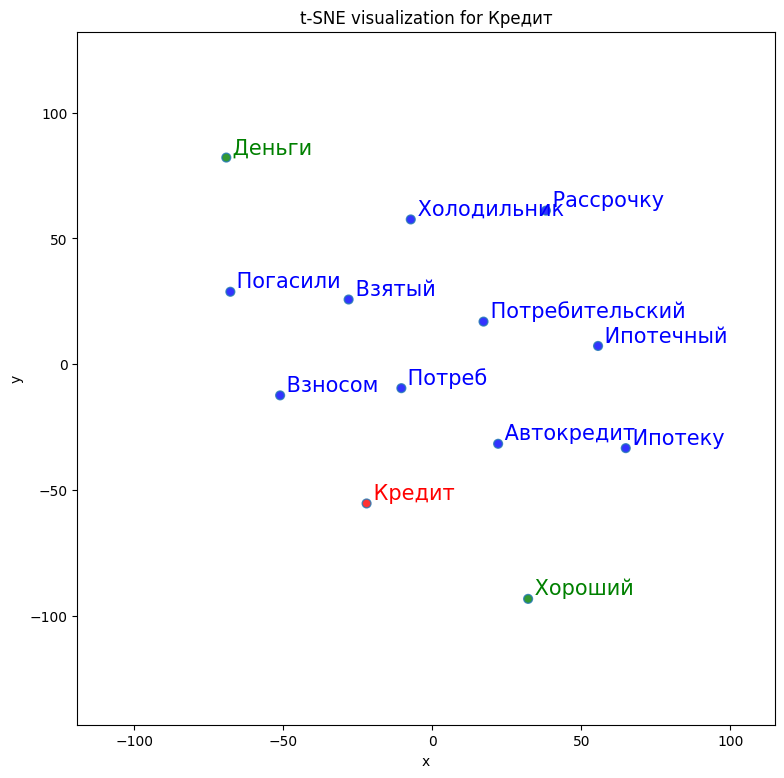

In [ ]:
tsne_scatterplot(w2v_model, "кредит", ["деньги", "хороший"])